# 量子もつれの実験
次に二つの量子ビットについての量子もつれ（エンタングルメント）の実験します。<br>
量子もつれ状態とは2つの量子ビットが、強い関連性で結ばれた状態で、量子アルゴリズムにおいて、重要な役割を果たします。

In [ ]:
# Qiskitライブラリーを導入
from qiskit import *
from qiskit.visualization import *

# 描画のためのライブラリーを導入
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# 2量子ビット回路を用意
q = QuantumCircuit(2,2)    # 2量子レジスターと2古典レジスターを用意します

# 回路を描画
q.draw(output="mpl")

# CNOTゲート
まず、量子もつれを作るための制御ゲート、$CNOT$ゲートを紹介します。<br>
$CNOT$ゲート（制御NOTゲート、CXゲートなどとも呼ばれます）は、２量子ビットにかかる量子ゲートで、制御ビットが1のときのみ、目標ビットの値を反転します。
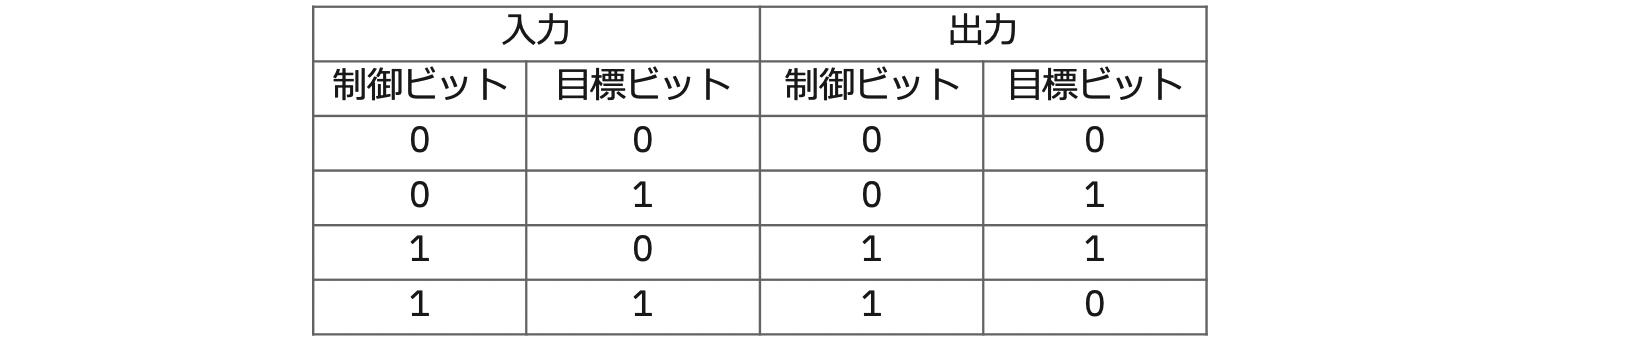
まず、q0とq1が両方とも0の場合を計算してみましょう。

In [ ]:
# q0, q1が0の場合

q = QuantumCircuit(2,2)    # 2量子レジスターと2古典レジスターを用意します

# CNOTゲートの制御ゲートをq0、目標ゲートをq1にセットします。
# コードを記入

# 回路を描画
q.draw(output="mpl")

状態ベクトルシミュレーターを使って計算してみます。

In [ ]:
# 状態ベクトルシミュレーターの実行
vector_sim = Aer.get_backend('statevector_simulator')
job = execute(q, vector_sim )
result = job.result().get_statevector(q, decimals=3)

print(result)

|00> にcxゲートを操作しても|00> のままです。

$ CX_{01} |00\rangle  = |00\rangle $


ここで、$ CX_{01} $の小文字の01は、制御ゲートがq0、目標ゲートがq1を意味します。

(注) [1.+0.j 　0.+0.j 　0.+0.j 　0.+0.j] の見方について：

$|00\rangle$は、$|0\rangle|0\rangle$ なので

$|0\rangle \otimes |0\rangle=\begin{bmatrix} 1 \\ 0 \end{bmatrix} \otimes \begin{bmatrix} 1 \\ 0 \end{bmatrix}
=
1\begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}+0\begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}+0\begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix}+0\begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix} $
$=1|00\rangle+0|01\rangle+0|10\rangle+0|11\rangle
$ 

[1.+0.j 　0.+0.j 　0.+0.j 　0.+0.j]は、この順番に並んでいます。


次に、$|01\rangle$ に$CX$ゲートを操作します。

ここで、Qiskitでは、最下位ビット(LSB)が右端で、量子力学の教科書とは逆であることに注意してください。つまり、1量子ビット目が一番右のビットで、2量子ビット目が右から２番目のビットです。$|01\rangle$ とは、q0が1で、q1が0を表しています。

In [ ]:
# 2量子ビット回路を用意
q = QuantumCircuit(2,2)    # 2量子レジスターと2古典レジスターを用意します

# q0=1, q1=0の場合：q0を1にします。
# コードを記入

# CNOTゲートの制御ゲートをq0、目標ゲートをq1にセットします。
# コードを記入

# 回路を描画
q.draw(output="mpl")

In [ ]:
# 状態ベクトルシミュレーターの実行
vector_sim = Aer.get_backend('statevector_simulator')
job = execute(q, vector_sim )
result = job.result().get_statevector(q, decimals=3)

print(result)

$|01\rangle$ に$CX$ゲートを操作すると$|11\rangle$ になりました。

$ CX_{01} |01\rangle  = |11\rangle $

QASMシミュレーターで計算してみましょう。

In [ ]:
# 回路を測定します
# q0を測定して、古典レジスター0に入れます。
# コードを記入

# q1を測定して、古典レジスター1に入れます。
# コードを記入

# 回路を描画
q.draw(output="mpl")

In [ ]:
# QASMシミュレーターで実験
simulator = Aer.get_backend('qasm_simulator')
job = execute(q, backend=simulator, shots=1024)
result = job.result()

#  測定された回数を表示
counts = result.get_counts(q)
print(counts)

# ヒストグラムで測定された確率をプロット
from qiskit.visualization import *
plot_histogram( counts )

$|11\rangle$の状態が100%測定されます。

# エンタングルメント

量子計算上でも重要な状態となる、量子もつれ状態（エンタングル状態）を生成してみましょう。
量子もつれ状態とは2つの量子ビットが、強い関連性で結ばれた状態を指します。
量子暗号や、量子テレポーテーションなどで利用されます。

2量子ビットの状態の1つの例が次のような形になります。
$$\frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle$$

これは、「片方の量子ビットが$|0\rangle$の場合に、もう片方の量子ビットも$|0\rangle$になっている」状態と、「片方の量子ビットが$|1\rangle$の場合に、もう片方の量子ビットも$|1\rangle$になっている」状態の重ね合わせ状態になっています。つまり、片方の量子ビットの状態が決まると、残りの量子ビットが確定するような状態となっています。別の言い方をすると、$|00\rangle$と$|11\rangle$という2つのデータが半々の確率で観測されることを示しています。<br>
では、実際にこの量子状態を作ってみましょう。<br>
最初に、2つの量子ビットを$|00\rangle$を準備します。

In [ ]:
# 2量子ビット回路を用意
q = QuantumCircuit(2)    # 今回は２量子ビット回路のみ用意します。

# 回路を描画
q.draw(output="mpl")

次に、片方の量子ビットを重ね合わせの状態にします。つまり、
$$ |00\rangle \rightarrow  \frac{1}{\sqrt{2}}|00\rangle  + \frac{1}{\sqrt{2}}|01\rangle  $$

In [ ]:
# q0を重ね合わせ状態にします。
# コードを記入

q.draw(output='mpl')

In [ ]:
# 状態ベクトルシミュレーターの実行
vector_sim = Aer.get_backend('statevector_simulator')
job = execute(q, vector_sim )
counts = job.result().get_counts(q)    # 実行結果の詳細を取り出し 
print(counts)

# ヒストグラムで測定された確率をプロット
from qiskit.visualization import *
plot_histogram( counts )

その後、CXゲートを作用させます。量子ビット0をコントロールビット、量子ビット1をターゲットビットとします。すると、右側が1の量子ビットに対して、残った方の量子ビットを反転させます。（0⇔1）
$$ CX_{01} (\frac{1}{\sqrt{2}}|00\rangle  + \frac{1}{\sqrt{2}}|01\rangle) \rightarrow \frac{1}{\sqrt{2}}|00\rangle  + \frac{1}{\sqrt{2}}|11\rangle $$

In [ ]:
# cxゲートを使って回路を完成させてください。順番に注意してください。
# コードを記入

q.draw(output='mpl')

では、シミュレーションをしてみて、どういう結果になるかを見てみましょう。

In [ ]:
# 状態ベクトルシミュレーターの実行
vector_sim = Aer.get_backend('statevector_simulator')
job = execute(q, vector_sim )
counts = job.result().get_counts(q)    # 実行結果の詳細を取り出し
print(counts)

# ヒストグラムで測定された確率をプロット
from qiskit.visualization import *
plot_histogram( counts )

いかがでしょうか？最後の結果では、$|00\rangle$と$|11\rangle$が半分ずつになりましたでしょうか？

最後に実デバイスで測定してみましょう。

In [ ]:
# 2量子ビット回路を用意
q = QuantumCircuit(2,2)    # 量子ビットと古典レジスターを用意します

# 量子回路を設計
q.h(0) 
q.cx(0,1) 

# 回路を測定
q.measure(0,0)
q.measure(1,1)

# 回路を描画
q.draw(output="mpl")

In [ ]:
# QASMシミュレーターで実験
simulator = Aer.get_backend('qasm_simulator')
job = execute(q, backend=simulator, shots=1024)
result = job.result()

#  測定された回数を表示
counts = result.get_counts(q)
print(counts)

# ヒストグラムで測定された確率をプロット
from qiskit.visualization import *
plot_histogram( counts )

ここで、初めて実デバイスで実行する人は[こちら](https://qiskit.org/documentation/locale/ja_JP/install.html#access-ibm-quantum-systems)を参考に、ご自分のAPIトークンをコピーして下のセルを実行してロードしてください。

In [ ]:
# 初めて実デバイスで実行する人はこちらを実行
from qiskit import IBMQ
IBMQ.save_account('MY_API_TOKEN')    # ご自分のトークンを入れてください

トークンをロードできたら、以下を続けます。

In [ ]:
# アカウント情報をロードして、使える量子デバイスを確認します
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

In [ ]:
# 最もすいているバックエンドを選びます
from qiskit.providers.ibmq import least_busy
large_enough_devices = IBMQ.get_provider().backends(filters=lambda x: x.configuration().n_qubits > 3 and not x.configuration().simulator) 
print(large_enough_devices)
real_backend = least_busy(large_enough_devices)   

print("ベストなバックエンドは " + real_backend.name())

In [ ]:
# 上記のバックエンドで実行します
job = execute(q,real_backend)

In [ ]:
# ジョブの実行状態を確認します
from qiskit.tools.monitor import job_monitor
job_monitor(job)

In [ ]:
# 結果を確認します
real_result= job.result()
print(real_result.get_counts(q))
plot_histogram(real_result.get_counts(q))

シミュレーションの結果とは異なり、00と11以外の結果も出力されています。これは、実機で発生したノイズによるものです。 ノイズの発生自体は、古典コンピューター上でも発生していますが、内部的にそれを補正する仕組みが実装されているため、我々ユーザーがノイズを気にすることがないレベルまで進歩しています。量子コンピューターでもノイズは発生するのですが、それを除去する仕組みを実装することはハードウェアの性能上、現状では困難とされています。
そこで、ノイズが発生することを許容する中規模の量子コンピューターデバイスの開発とそこで適用可能なアルゴリズムが実用に最も近いとされています。

### 演習2-1.
2量子ビットでは、以下のような状態も量子もつれ状態になります。
$$ \frac{1}{\sqrt{2}}|01\rangle + \frac{1}{\sqrt{2}}|10\rangle $$

ここまでの回路にもう１つ操作を加えると作ることができます。量子回路を作って、シミュレーターと実機で実行してみてください。

In [ ]:
# Qiskitバージョンの確認
from qiskit import *
qiskit.__qiskit_version__